In [35]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/spam-ham-sms-dataset/sms_spam.csv


In [3]:
df=pd.read_csv("/kaggle/input/spam-ham-sms-dataset/sms_spam.csv")
df.sample(20)

,type,text
339,ham,Dude got a haircut. Now its breezy up there
3043,spam,Hope you enjoyed your new content. text stop t...
4690,ham,Sindu got job in birla soft ..
1432,ham,He said i look pretty wif long hair wat. But i...
2874,ham,Both :) i shoot big loads so get ready!
944,ham,That way transport is less problematic than on...
4101,ham,Smith waste da.i wanna gayle.
491,ham,Ya had just now.onion roast.
267,ham,In which place do you want da.
4122,ham,"Yep, at derek's house now, see you Sunday 3"


# data cleaning
# eda
# text preprocesing
# model building
# evluation
# improvements depeding improvemnt 
# convert into website 
# # deploy on heroku.

# DATA CLEANING

In [16]:
df.drop_duplicates(inplace=True) #drop duplicates values

In [17]:
df.duplicated().sum() #check duplicate values 

0

In [18]:
df.describe()

,type,text
count,5156,5156
unique,2,5156
top,ham,Hope you are having a good week. Just checking in
freq,4503,1


In [24]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

df["type"]=encoder.fit_transform(df["type"])

df.head(2)  #0 for ham and 1 for spam

,type,text
0,0,Hope you are having a good week. Just checking in
1,0,K..give back my thanks.


In [28]:
df.isnull().sum() #to check the null values

type    0
text    0
dtype: int64

# Eda.

In [30]:
df["type"].value_counts() #data is imbalance.

type
0    4503
1     653
Name: count, dtype: int64

# Data is imbalance

([<matplotlib.patches.Wedge at 0x7880df9a2b90>,
 [Text(-1.0140737325189368, 0.4262094145078354, 'ham'),
  Text(1.0140737524712384, -0.42620936703561757, 'spam')],
 [Text(-0.553131126828511, 0.23247786245881927, '87.34'),
  Text(0.5531311377115845, -0.23247783656488227, '12.66')])

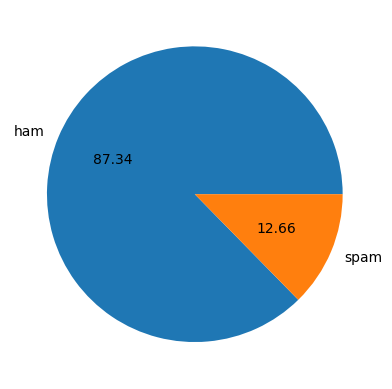

In [36]:
plt.pie(df["type"].value_counts(),labels=["ham","spam"],autopct="%0.2f")

In [37]:
import nltk
nltk.download("punkt")

[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [45]:
df["number of character"]=df["text"].apply(lambda x:len(x))
df["number of words"] = df["text"].apply(lambda x:len(nltk.word_tokenize(x)))
df["number of senetence"] = df["text"].apply(lambda x:len(nltk.sent_tokenize(x)))

In [46]:
df.head(2)

,type,text,number of character,number of words,number of senetence
0,0,Hope you are having a good week. Just checking in,49,11,2
1,0,K..give back my thanks.,23,5,1


In [47]:
df.describe()

,type,number of character,number of words,number of senetence
count,5156.000000,5156.000000,5156.000000,5156.000000
mean,0.126649,78.658844,18.002715,1.969550
std,0.332611,57.615904,12.659443,1.442746
min,0.000000,2.000000,1.000000,1.000000
25%,0.000000,35.000000,9.000000,1.000000
50%,0.000000,60.000000,14.000000,1.500000
75%,0.000000,117.250000,26.000000,2.000000
max,1.000000,910.000000,196.000000,38.000000


In [52]:
#ham messgae
df[df["type"]==0][["number of character","number of words","number of senetence"]].describe()

,number of character,number of words,number of senetence
count,4503.000000,4503.000000,4503.000000
mean,70.104375,16.620919,1.822341
std,55.626601,12.711541,1.374215
min,2.000000,1.000000,1.000000
25%,33.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,196.000000,38.000000


In [53]:
#spam messages
df[df["type"]==1][["number of character","number of words","number of senetence"]].describe()

,number of character,number of words,number of senetence
count,653.000000,653.000000,653.000000
mean,137.649311,27.531394,2.984686
std,29.825481,6.874489,1.495313
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,148.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,223.000000,43.000000,9.000000


<Axes: ylabel='Count'>

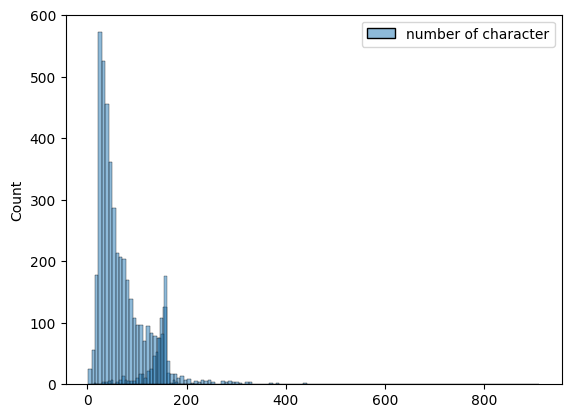

In [56]:
import seaborn 
#for ham messgae
sns.histplot(df[df["type"]==0][["number of character"]])

#for spaam messgae
sns.histplot(df[df["type"]==1][["number of character"]],color="green")

<Axes: ylabel='Count'>

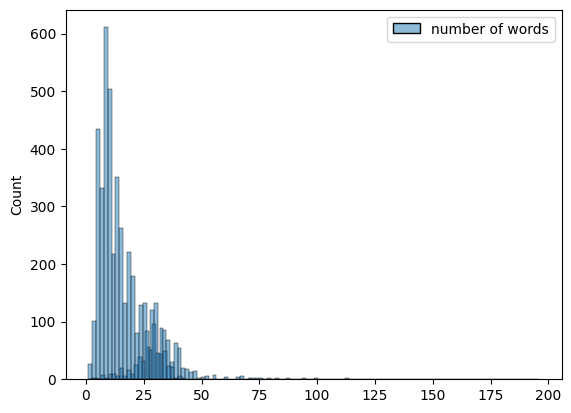

In [58]:
import seaborn 
#for ham messgae
sns.histplot(df[df["type"]==0][["number of words"]])

#for spaam messgae
sns.histplot(df[df["type"]==1][["number of words"]],color="red")

<Axes: ylabel='Count'>

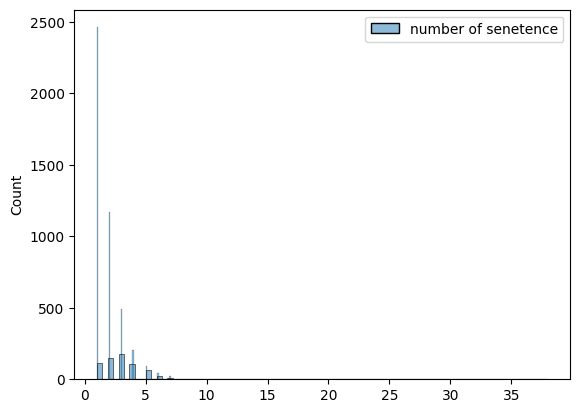

In [60]:
import seaborn 
#for ham messgae
sns.histplot(df[df["type"]==0][["number of senetence"]])

#for spaam messgae
sns.histplot(df[df["type"]==1][["number of senetence"]],color="red")

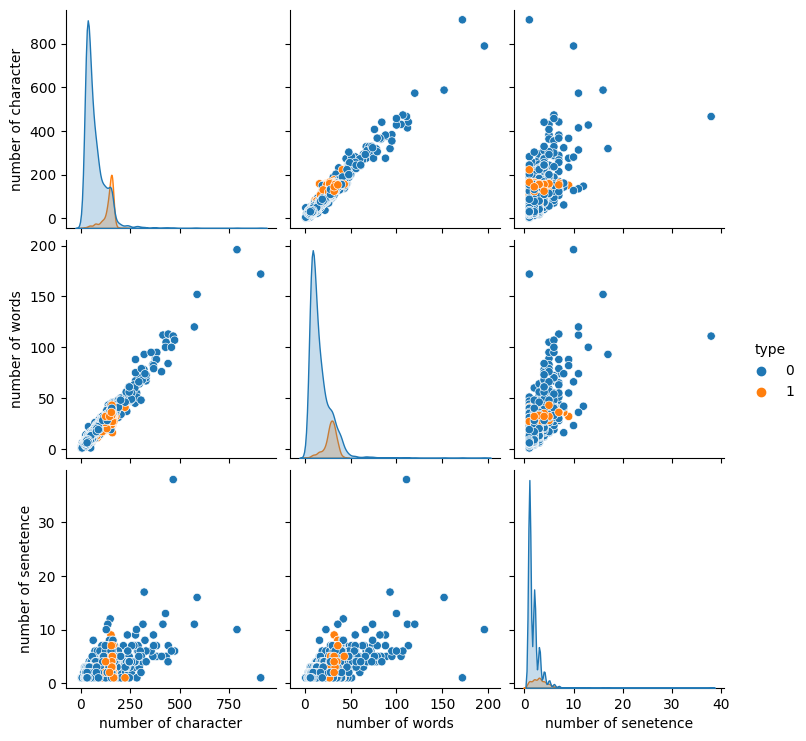

In [63]:
sns.pairplot(df,hue="type")

In [76]:
df=df[["text","type","number of character"]] #there is multi colinearity in the data.
df.head(2)

,text,type,number of character
0,Hope you are having a good week. Just checking in,0,49
1,K..give back my thanks.,0,23


# Data preprocessing
# 1:lower case
# 2:tokenization
# 3:removing special charcater
# 4:removings stop words and punctuation
# 5:stemming

In [129]:
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
print(stopwords.words("english"))
import string
print(string.punctuation)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [148]:

def datapreprocesiing(text):
    text = text.lower()  #convert text into lower case
    text = nltk.word_tokenize(text) #text to token
    y=[]
    for i in text:
        if i.isalnum():  #remove special chracteres
            y.append(i)
    text = y[:]
    y.clear()
    
    for i in text: #to remove punctutaion and stopwords
        if i not in stopwords.words("english") and i not in string.punctuation:
            y.append(i)
    
    text = y[:]
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))
    return " ".join(y)
    
    text = y[:] 
    y.clear()

In [153]:
datapreprocesiing("Sure thing big man. i have hockey elections at 6, shouldn€˜t go on longer than an hour though'")

'sure thing big man hockey elect 6 go longer hour though'

In [157]:
df["transform_text"]=df["text"].apply(datapreprocesiing)
df.head(2)

,text,type,number of character,transform_text
0,Hope you are having a good week. Just checking in,0,49,hope good week check
1,K..give back my thanks.,0,23,back thank


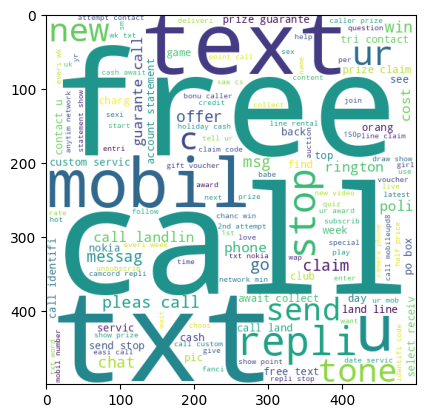

In [170]:
from wordcloud import WordCloud

wc =  WordCloud(width=500,height=500,min_font_size=10,background_color="white")

spam_wc=wc.generate(df[df["type"]==1]["transform_text"].str.cat(sep=""))

plt.imshow(spam_wc)

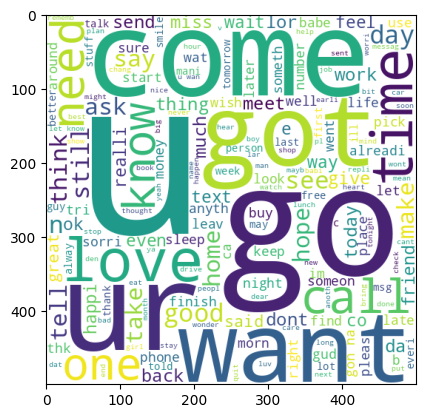

In [173]:
from wordcloud import WordCloud

wc =  WordCloud(width=500,height=500,min_font_size=10,background_color="white")

ham_wc=wc.generate(df[df["type"]==0]["transform_text"].str.cat(sep=""))

plt.imshow(ham_wc) #for ham message


In [180]:
ham_corpus = []
for msg in df[df["type"]==0]["transform_text"].tolist():
    for word in msg.split():
        ham_corpus.append(word)
len(ham_corpus)

34442

In [181]:
spam_corpus = []
for msg in df[df["type"]==1]["transform_text"].tolist():
    for word in msg.split():
        spam_corpus.append(word)
len(spam_corpus)

9922

In [193]:
from collections import Counter

top_words_spam=Counter(spam_corpus)
top_words_ham =Counter(ham_corpus)

In [204]:
#nOW CONVERT TEXT TO VECTORS

from sklearn.feature_extraction.text import CountVectorizer

cv=CountVectorizer()

X=cv.fit_transform(df["transform_text"]).toarray()


y=df["type"].values

from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=12)

from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB

In [205]:
GNB = GaussianNB()
MNB = MultinomialNB()
BNB = BernoulliNB()

In [217]:
GNB.fit(X_train,y_train)
y_pred=GNB.predict(X_test)
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(precision_score(y_test,y_pred))

0.8614341085271318
[[774 134]
 [  9 115]]
0.46184738955823296


In [220]:
MNB.fit(X_train,y_train)
y_pred2=MNB.predict(X_test)
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9806201550387597
[[893  15]
 [  5 119]]
0.8880597014925373


In [221]:
BNB.fit(X_train,y_train)
y_pred3=BNB.predict(X_test)
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9718992248062015
[[902   6]
 [ 23 101]]
0.9439252336448598


In [241]:
import pickle
pickle.dump(cv,open("vectorizer.pkl","wb"))
pickle.dump(BNB,open("model.pkl","wb"))